# WQD7005 - Data Mining
## Lab Exersice 2

#### Matrix Number : 17043640

#### Name                 : Gunasegarran Magadevan

#### 1. Prequisite
Perform the following steps before trying the lab test 2:

Import pandas as "pd" and load the house price dataset into "df".
Print dataset information to refresh your memory.
Run preprocess_data function on the dataframe to perform preprocessing steps 
discussed last week (lab 1 dataset).

In [1]:
import pandas as pd

 # read the dataset
df = pd.read_csv('lab1.csv')
df.head()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,13,A,0,0,NaN,F,U,0,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,24,A,0,23,67.0,F,U,186800,85,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,22,S,1,0,NaN,M,U,87600,36,38750
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,16,E,1,0,NaN,M,U,139200,27,38942
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,6,F,0,35,53.0,M,U,168100,37,71509


In [2]:
import numpy as np
import pandas as pd

def data_prep():
    
    # change DemCluster from interval/integer to nominal/str
    df['DemCluster'] = df['DemCluster'].astype(str)
    
    # change DemHomeOwner into binary 0/1 variable
    dem_home_owner_map = {'U':0, 'H': 1}
    df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner_map)
    
    # denote errorneous values in DemMidIncome
    mask = df['DemMedIncome'] < 1
    df.loc[mask, 'DemMedIncome'] = np.nan
    
    # impute missing values in DemAge with its mean
    df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)

    # impute med income using mean
    df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)

    # impute gift avg card 36 using mean
    df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)
    
    # drop ID and the unused target variable
    df.drop(['ID', 'TargetD'], axis=1, inplace=True)
    
    # one-hot encoding
    df = pd.get_dummies(df)
    
    return df

In [3]:
# auto import the python function from Lab_Exercise_2 path
from dm_tools import data_prep

#### 2. Data Partitioning
Perform following operations and answer the following questions:

##### a) Describe training, validation and test dataset.
##### b) What is the purpose for each of these split?
#### c) What is k-fold cross validation? 
#### d) What is the advantage and disadvantage of k-fold CV compared to normal training/test/validation method?

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# preprocessing step
df = data_prep()

# target/input split
y = df['TargetB']
X = df.drop(['TargetB'], axis=1)

In [6]:
# setting random state
rs = 10

X_mat = np.asmatrix(X)
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

##### 3. Decision Tree
Perform the following operations and answer the question.

##### a) Import and build a decision tree classifier. 
##### b) Set the random state to 0 to ensure your result is similar with the answers. 
##### c) Fit it against the training data.
##### d) What is the performance of the model against training data? 
##### e) How about against the test data? Do you see any indication of overfitting here?
##### f) What are the top 5 most important features in this model?
##### g) Visualise the structure of your decision tree. Can you identify characteristics of important features?

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [8]:
print("Train accuracy:", model.score(X_train, y_train), ", Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0 , Test accuracy: 0.5216792842395045


In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1453
           1       0.52      0.54      0.53      1453

    accuracy                           0.52      2906
   macro avg       0.52      0.52      0.52      2906
weighted avg       0.52      0.52      0.52      2906



In [10]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

DemMedHomeValue : 0.10371353665921498
DemMedIncome : 0.07677600801105956
GiftAvgAll : 0.06980988595894197
DemPctVeterans : 0.06613214928597241
DemAge : 0.060750495114459305
GiftTimeFirst : 0.04594492638340621
GiftAvgLast : 0.039119529776787676
GiftAvgCard36 : 0.0380219076090902
GiftTimeLast : 0.03754481714205862
PromCntAll : 0.03536307758528952
PromCnt36 : 0.0344873233968644
GiftAvg36 : 0.03333456207629517
PromCntCardAll : 0.031160032819215713
GiftCntCardAll : 0.029090632497530206
GiftCnt36 : 0.02902465415187723
GiftCntAll : 0.02844273638690637
PromCntCard36 : 0.02602984397479075
PromCnt12 : 0.02179582564122642
GiftCntCard36 : 0.014245411759881576
PromCntCard12 : 0.009727393864117933


In [11]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("lab2_dt_viz.png")

![Simple decision tree structure](lab2_dt_viz.png)

In [12]:
#retrain with a small max_depth limit

model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train),", Test accuracy:", model.score(X_test, y_test))
print()

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.5724188790560472 , Test accuracy: 0.5467997247075017

              precision    recall  f1-score   support

           0       0.56      0.42      0.48      1453
           1       0.54      0.67      0.60      1453

    accuracy                           0.55      2906
   macro avg       0.55      0.55      0.54      2906
weighted avg       0.55      0.55      0.54      2906



In [13]:
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("week3_dt_viz.png") # saved in the following file

GiftCnt36 : 0.4735894757566948
GiftAvgLast : 0.2162443601186481
GiftTimeLast : 0.11378854045338041
DemMedHomeValue : 0.10584693229397368
GiftCntAll : 0.07136807839806607
DemCluster_8 : 0.019162612979236944
DemCluster_11 : 0.0
StatusCat96NK_F : 0.0
StatusCat96NK_L : 0.0
StatusCat96NK_N : 0.0
StatusCat96NK_S : 0.0
DemCluster_0 : 0.0
DemCluster_1 : 0.0
DemCluster_10 : 0.0
DemCluster_12 : 0.0
StatusCat96NK_A : 0.0
DemCluster_13 : 0.0
DemCluster_14 : 0.0
DemCluster_15 : 0.0
DemCluster_16 : 0.0


In [14]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))

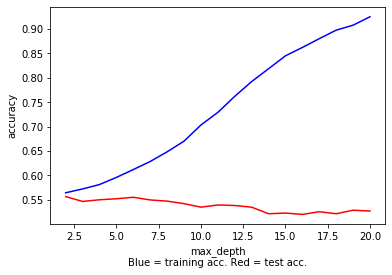

In [15]:
import matplotlib.pyplot as plt

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.5941002949852507
Test accuracy: 0.5750172057811425
              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1453
           1       0.58      0.52      0.55      1453

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.57      2906
weighted avg       0.58      0.58      0.57      2906

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}


In [17]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(45, 56)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.5941002949852507
Test accuracy: 0.5750172057811425
              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1453
           1       0.58      0.52      0.55      1453

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.57      2906
weighted avg       0.58      0.58      0.57      2906

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 52}


In [18]:

def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [19]:
# do the feature importance and visualization analysis on GridSearchCV's best model
from dm_tools import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "lab2_optimal_tree.png")

GiftCnt36 : 0.3145747548923073
DemMedHomeValue : 0.16686477652838466
GiftAvgLast : 0.1363572066419375
GiftTimeLast : 0.07734861577872883
DemPctVeterans : 0.048858719278719986
StatusCatStarAll : 0.04487976794207267
GiftCntAll : 0.043629304229231364
PromCntCardAll : 0.037608916167442205
GiftCntCardAll : 0.034123593488031664
PromCnt36 : 0.01910354419233966
StatusCat96NK_A : 0.016241872882363267
GiftTimeFirst : 0.014949559832823851
PromCntCard12 : 0.013663572834417938
GiftAvgCard36 : 0.012727191422559615
GiftAvgAll : 0.011772716724184033
PromCnt12 : 0.007295887164455312
DemCluster_14 : 0.0
DemCluster_10 : 0.0
DemCluster_11 : 0.0
DemCluster_12 : 0.0


![GridSearchCV decision tree](lab2_optimal_tree.png)